## Stock Price Predictor
using Long Short-Term Memory (LSTM) ; A type of recurrent neural network

In [2]:
import numpy as np
import pandas as pd
import pandas_datareader as web
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv("MSFT.csv")

In [7]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061434,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063628,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064725,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063079,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061982,47894400
...,...,...,...,...,...,...,...
9078,2022-03-18,295.369995,301.000000,292.730011,300.429993,300.429993,43317000
9079,2022-03-21,298.890015,300.140015,294.899994,299.160004,299.160004,28351200
9080,2022-03-22,299.799988,305.000000,298.769989,304.059998,304.059998,27599700
9081,2022-03-23,300.510010,303.230011,297.720001,299.489990,299.489990,25715400


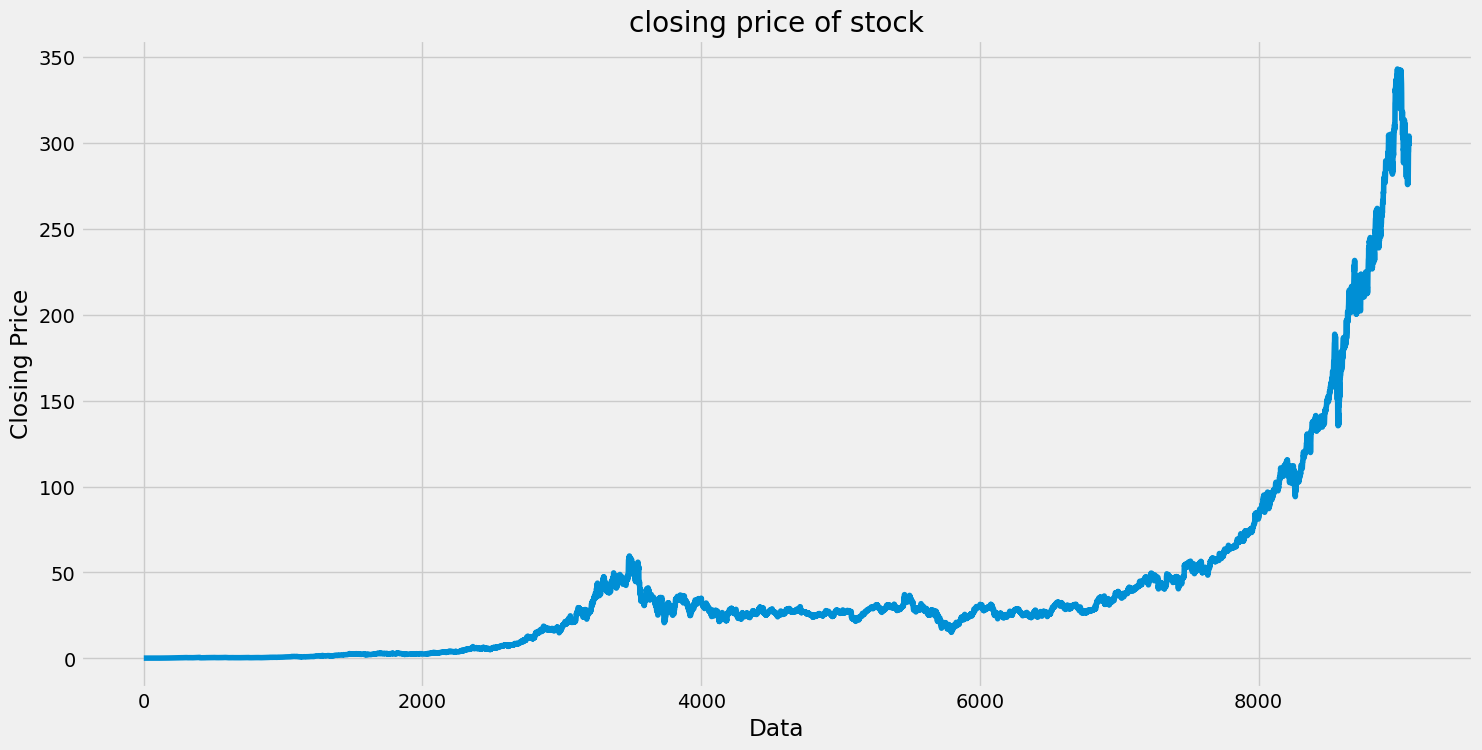

In [9]:
#Visulaize the closing prices
plt.figure(figsize=(16,8))
plt.title('closing price of stock')
plt.plot(df["Close"])
plt.xlabel('Data')
plt.ylabel('Closing Price')
plt.show()

In [10]:
df.shape

(9083, 7)

In [12]:
#Create a new database with only required columns
data = df.filter(['Close'])

#Convert the dataframe to a numpy array
dataset = data.values

#Get the number of rows to train 80%
training_data_len = math.ceil(len(dataset)*.8)
training_data_len

7267

In [ ]:
#Scale the data ; Not scaling the data can lead to a decrease in NN performance
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset)
print("MEAN of processed data: ", scaled_data.mean())
print("Standard deviation of processed data: ", scaled_data.std())

MEAN of processed data:  1.0013153162753806e-16
Standard deviation of processed data:  1.0


In [16]:
# Create the training data
# Create scaled training dataset
train_data = scaled_data[0:training_data_len, :]
#split the data to x_train and y_train
x_train = []
y_train = []
for i in range (60, len(train_data)):
    x_train.append(train_data[i-60:i])
    y_train.append(train_data[i])

In [17]:
#convert x_train and y_train into numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)
x_train.shape

(7207, 60, 1)

In [ ]:
#reshape the data
print("x_train shape before reshaping", x_train.shape)
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1], 1))
print("x_train shape after reshaping", x_train.shape)

x_train shape before reshaping (7207, 60, 1)
x_train shape after reshaping (7207, 60, 1)


In [ ]:
#Build LSTM RNN model
model = Sequential()
model.add(LSTM(200, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(200, return_sequences=False))
model.add(Dense(100))
model.add(Dense(50))
model.add(Dense(1))

In [21]:
#compile model
model.compile(optimizer='adam', loss = 'mean_squared_error')

In [22]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 200)        │       161,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 200)            │       320,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 507,601 (1.94 MB)

 Trainable params: 507,601 (1.94 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
#train the model
history = model.fit(x_train, y_train, epochs = 5)

Epoch 1/5
226/226 ━━━━━━━━━━━━━━━━━━━━ 31s 135ms/step - loss: 2.6383e-04
Epoch 2/5
226/226 ━━━━━━━━━━━━━━━━━━━━ 37s 166ms/step - loss: 2.2945e-04
Epoch 3/5
226/226 ━━━━━━━━━━━━━━━━━━━━ 31s 139ms/step - loss: 2.2619e-04
Epoch 4/5
226/226 ━━━━━━━━━━━━━━━━━━━━ 30s 132ms/step - loss: 2.2347e-04
Epoch 5/5
226/226 ━━━━━━━━━━━━━━━━━━━━ 28s 125ms/step - loss: 1.8573e-04


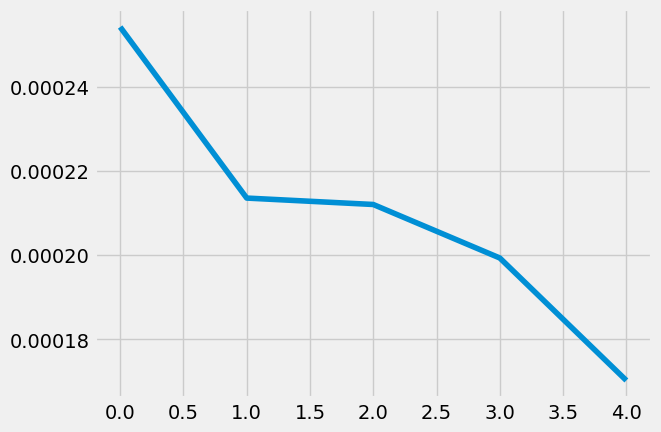

In [ ]:
plt.plot(history.history['loss'])
#Loss is constantly reducing after each epoch

In [26]:
#Create the testing dataset
#Create new array
test_data = scaled_data[training_data_len-60:, :]
#create the dataset x_test and y_test
x_test = []
y_test = dataset[training_data_len: , :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [27]:
#convert the data to numpy 
x_test = np.array(x_test)

In [28]:
#reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [ ]:
#get the model predicted value
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
print(predictions)


57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step
[[ 45.477085]
 [ 45.596012]
 [ 45.82676 ]
 ...
 [246.75876 ]
 [250.60643 ]
 [252.79518 ]]


In [ ]:
S